This Notebook provides a trend evaluation of Global life expectancy across the globe from 160- 2023.



In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import country_converter as coco
import plotly.express as px
import seaborn as sns
from prophet import Prophet # prediction and forecasting Tool




In [93]:
#downloading the data
df=pd.read_excel('/content/life expectancy 1961-2024.xlsx')
df.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Afghanistan,AFG,32.799,33.291,33.757,34.201,34.673,35.124,35.583,36.042,...,62.270,62.646,62.406,62.443,62.941,61.454,60.417,65.617,66.035,NaN
1,Albania,ALB,56.413,57.488,58.494,59.479,60.404,61.273,62.149,62.976,...,78.358,78.643,78.900,79.238,79.467,77.824,76.844,78.769,79.602,NaN
2,Algeria,DZA,40.839,40.792,39.527,43.143,42.987,42.846,42.745,42.731,...,75.159,75.310,75.431,75.555,75.682,73.257,75.208,76.129,76.261,NaN
3,American Samoa,ASM,65.053,65.648,66.008,66.161,66.135,65.996,58.284,65.807,...,72.654,72.640,72.801,72.794,72.751,72.672,72.708,72.752,72.852,NaN
4,Andorra,AND,72.094,72.573,72.993,73.298,73.624,73.856,74.020,74.119,...,84.532,84.489,84.359,84.242,84.098,79.418,82.331,84.016,84.041,NaN


In [94]:
df.tail()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
211,Virgin Islands (U.S.),VIR,62.743537,63.121707,62.668024,61.434707,64.124927,64.787927,63.677073,64.42561,...,79.017073,79.168293,79.368293,79.519512,79.668293,79.819512,80.068293,80.319512,80.519512,NaN
212,West Bank and Gaza,PSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,74.577000,74.917000,75.216000,75.380000,75.811000,74.998000,73.890000,76.662000,65.170000,NaN
213,"Yemen, Rep.",YEM,33.462000,34.058000,33.669000,33.431000,34.907000,35.592000,36.264000,37.07900,...,66.761000,67.105000,67.120000,65.915000,66.567000,66.435000,66.019000,67.952000,69.295000,NaN
214,Zambia,ZMB,50.648000,51.041000,51.331000,51.605000,51.170000,52.079000,52.290000,52.51200,...,60.728000,61.129000,61.564000,62.138000,62.914000,63.361000,62.363000,65.279000,66.349000,NaN
215,Zimbabwe,ZWE,53.492000,53.966000,54.453000,54.942000,55.431000,55.905000,56.359000,56.76600,...,58.989000,59.760000,60.263000,60.906000,61.060000,61.530000,60.135000,62.360000,62.775000,NaN


In [95]:
#characteristics of the data frame
df.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
count,214.000000,215.000000,215.000000,214.000000,214.000000,214.000000,215.000000,215.000000,215.000000,215.000000,...,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,0.0
mean,54.822055,55.366829,55.810375,56.120028,56.623909,56.972623,57.419002,57.887049,58.214157,58.460216,...,72.074432,72.304505,72.461759,72.828601,72.992582,72.467916,71.761061,73.071483,73.766328,NaN
std,11.666956,11.607755,11.383876,11.315052,11.234249,11.251419,11.223287,11.124472,10.995034,10.992996,...,8.218041,8.170438,8.209305,7.722913,7.972247,7.402854,7.709407,7.942689,7.131008,NaN
min,28.054000,28.278000,28.506000,28.249000,31.231000,28.781000,25.633000,25.858000,26.103000,25.396000,...,39.757000,36.720000,35.351000,51.905000,31.530000,50.596000,40.279000,18.818000,54.462000,NaN
25%,44.725787,45.608341,46.480500,46.842250,47.756750,48.228750,48.726500,49.760000,50.411598,50.879000,...,65.994500,66.482750,66.765000,66.975500,67.271250,66.945750,66.387250,67.769250,68.447250,NaN
50%,56.476000,57.087000,57.742000,57.838500,58.168500,58.582000,59.232000,59.530000,59.767000,60.504000,...,73.539195,73.656915,74.009500,73.965500,74.105671,72.888500,72.204024,74.150988,74.524000,NaN
75%,64.929000,65.696500,65.861500,66.193250,66.476250,66.701866,67.341915,67.550976,67.921500,68.008500,...,78.158000,78.357250,78.558018,78.666768,78.681707,78.021750,77.224963,78.284250,79.004500,NaN
max,74.040073,73.652683,73.721951,73.586000,73.855927,74.106463,74.316195,74.499610,74.696171,74.842927,...,85.323000,85.630000,85.878000,86.084000,86.151000,86.089000,85.532683,85.746000,86.372000,NaN


In [96]:
df.describe (include='object')

,Country Name,Country Code
count,216,216
unique,216,216
top,Afghanistan,AFG
freq,1,1


In [97]:
df.nunique()

,0
Country Name,216
Country Code,216
1960,213
1961,214
1962,214
...,...
2020,216
2021,215
2022,214
2023,216


In [98]:
#rows and columns of the data frame
df.shape

(216, 67)

cleaning the data frame

In [99]:
#checking for missing values
df.isnull().sum()

,0
Country Name,0
Country Code,0
1960,2
1961,1
1962,1
...,...
2020,0
2021,0
2022,0
2023,0


In [100]:
#percentage of missing values
df.isnull().mean()*100

,0
Country Name,0.000000
Country Code,0.000000
1960,0.925926
1961,0.462963
1962,0.462963
...,...
2020,0.000000
2021,0.000000
2022,0.000000
2023,0.000000


In [101]:
#dropping columns with all missing values(unneccesary column)
print(df.columns)


Index(['Country Name', 'Country Code', '1960', '1961', '1962', '1963', '1964',
       '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973',
       '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982',
       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020', '2021', '2022', '2023', '2024'],
      dtype='object')


In [102]:
#checking for rows with missing values
df.isnull().any(axis=1).sum()


np.int64(216)

In [25]:
#filling in the row with Nan(missing values) values
years_to_fill = [str(y) for y in range(1960, 1989)]
df.loc[:, years_to_fill] = df.loc[:, years_to_fill].fillna(0)
print (df)



              Country Name Country Code       1960       1961       1962  \
0              Afghanistan          AFG  32.799000  33.291000  33.757000   
1                  Albania          ALB  56.413000  57.488000  58.494000   
2                  Algeria          DZA  40.839000  40.792000  39.527000   
3           American Samoa          ASM  65.053000  65.648000  66.008000   
4                  Andorra          AND  72.094000  72.573000  72.993000   
..                     ...          ...        ...        ...        ...   
211  Virgin Islands (U.S.)          VIR  62.743537  63.121707  62.668024   
212     West Bank and Gaza          PSE   0.000000   0.000000   0.000000   
213            Yemen, Rep.          YEM  33.462000  34.058000  33.669000   
214                 Zambia          ZMB  50.648000  51.041000  51.331000   
215               Zimbabwe          ZWE  53.492000  53.966000  54.453000   

          1963       1964       1965       1966      1967  ...       2015  \
0    34.20

In [103]:
df.loc[df['Country Name'] == 'West Bank and Gaza']


,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
212,West Bank and Gaza,PSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,74.577,74.917,75.216,75.38,75.811,74.998,73.89,76.662,65.17,NaN


In [27]:
print(df)

              Country Name Country Code       1960       1961       1962  \
0              Afghanistan          AFG  32.799000  33.291000  33.757000   
1                  Albania          ALB  56.413000  57.488000  58.494000   
2                  Algeria          DZA  40.839000  40.792000  39.527000   
3           American Samoa          ASM  65.053000  65.648000  66.008000   
4                  Andorra          AND  72.094000  72.573000  72.993000   
..                     ...          ...        ...        ...        ...   
211  Virgin Islands (U.S.)          VIR  62.743537  63.121707  62.668024   
212     West Bank and Gaza          PSE   0.000000   0.000000   0.000000   
213            Yemen, Rep.          YEM  33.462000  34.058000  33.669000   
214                 Zambia          ZMB  50.648000  51.041000  51.331000   
215               Zimbabwe          ZWE  53.492000  53.966000  54.453000   

          1963       1964       1965       1966      1967  ...       2015  \
0    34.20

In [28]:
if 'Country Code' in df.columns:
    print("'Country Code' column exists in the DataFrame.")
else:
    print("'Country Code' column does NOT exist in the DataFrame.")

print(df.columns)

'Country Code' column exists in the DataFrame.
Index(['Country Name', 'Country Code', '1960', '1961', '1962', '1963', '1964',
       '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973',
       '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982',
       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020', '2021', '2022', '2023', '2024'],
      dtype='object')


In [104]:
df

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Afghanistan,AFG,32.799000,33.291000,33.757000,34.201000,34.673000,35.124000,35.583000,36.04200,...,62.270000,62.646000,62.406000,62.443000,62.941000,61.454000,60.417000,65.617000,66.035000,NaN
1,Albania,ALB,56.413000,57.488000,58.494000,59.479000,60.404000,61.273000,62.149000,62.97600,...,78.358000,78.643000,78.900000,79.238000,79.467000,77.824000,76.844000,78.769000,79.602000,NaN
2,Algeria,DZA,40.839000,40.792000,39.527000,43.143000,42.987000,42.846000,42.745000,42.73100,...,75.159000,75.310000,75.431000,75.555000,75.682000,73.257000,75.208000,76.129000,76.261000,NaN
3,American Samoa,ASM,65.053000,65.648000,66.008000,66.161000,66.135000,65.996000,58.284000,65.80700,...,72.654000,72.640000,72.801000,72.794000,72.751000,72.672000,72.708000,72.752000,72.852000,NaN
4,Andorra,AND,72.094000,72.573000,72.993000,73.298000,73.624000,73.856000,74.020000,74.11900,...,84.532000,84.489000,84.359000,84.242000,84.098000,79.418000,82.331000,84.016000,84.041000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,Virgin Islands (U.S.),VIR,62.743537,63.121707,62.668024,61.434707,64.124927,64.787927,63.677073,64.42561,...,79.017073,79.168293,79.368293,79.519512,79.668293,79.819512,80.068293,80.319512,80.519512,NaN
212,West Bank and Gaza,PSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,74.577000,74.917000,75.216000,75.380000,75.811000,74.998000,73.890000,76.662000,65.170000,NaN
213,"Yemen, Rep.",YEM,33.462000,34.058000,33.669000,33.431000,34.907000,35.592000,36.264000,37.07900,...,66.761000,67.105000,67.120000,65.915000,66.567000,66.435000,66.019000,67.952000,69.295000,NaN
214,Zambia,ZMB,50.648000,51.041000,51.331000,51.605000,51.170000,52.079000,52.290000,52.51200,...,60.728000,61.129000,61.564000,62.138000,62.914000,63.361000,62.363000,65.279000,66.349000,NaN


In [30]:
#dropping country code column
df.drop(columns=['Country Code'], inplace=True)
print(df.columns)

Index(['Country Name', '1960', '1961', '1962', '1963', '1964', '1965', '1966',
       '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984',
       '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
       '2021', '2022', '2023', '2024'],
      dtype='object')


In [31]:
df.drop(columns=['2024'],inplace=True)
print(df.columns)

Index(['Country Name', '1960', '1961', '1962', '1963', '1964', '1965', '1966',
       '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984',
       '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
       '2021', '2022', '2023'],
      dtype='object')


##**EXPLORATORY DATA ANALYSIS and PREDICTIONS**

####**Global Level Trends**

In [106]:
#average life expectancy across the countries
# Melting the wide format into long format
# Get the list of year columns
year_cols = [col for col in df.columns if col.isdigit()]

df_long = df.melt(id_vars=["Country Name", "Country Code"], #keep the country columns as they are.
                  value_vars=year_cols, # Melt the year columns
                  var_name="Year", # take all those year columns (1960–2023) and put them into one new column called "Year".
                  value_name="LifeExpectancy") # the values under each year become entries in a column called "LifeExpectancy".

# Converting Year to integer
df_long["Year"] = df_long["Year"].astype(int)

print(df_long.head())

     Country Name Country Code  Year  LifeExpectancy
0     Afghanistan          AFG  1960          32.799
1         Albania          ALB  1960          56.413
2         Algeria          DZA  1960          40.839
3  American Samoa          ASM  1960          65.053
4         Andorra          AND  1960          72.094


In [107]:
global_avg = df_long.groupby("Year")["LifeExpectancy"].mean().reset_index()
global_avg.rename(columns={"LifeExpectancy": "Global_Avg_LifeExpectancy"}, inplace=True)

print(global_avg.head())


   Year  Global_Avg_LifeExpectancy
0  1960                  54.822055
1  1961                  55.366829
2  1962                  55.810375
3  1963                  56.120028
4  1964                  56.623909


In [113]:
# Converting country names into continents
df["Continent"] = coco.convert(names=df["Country Name"], to="continent")

# Filtering only African countries
africa = df[df["Continent"] == "Africa"]

print(africa.head())

# Grouping by Continent and Year
# Get the list of year columns
year_cols = [col for col in df.columns if col.isdigit()]

df_long = df.melt(id_vars=["Country Name", "Continent"],
                  value_vars=year_cols, # Explicitly specify year columns as value_vars
                  var_name="Year", value_name="Life Expectancy")
df_long["Year"] = df_long["Year"].astype(int)

# Computing average per continent per year
regional_trends = df_long.groupby(["Continent", "Year"])["Life Expectancy"].mean().reset_index()



    Country Name Country Code    1960    1961    1962    1963    1964    1965  \
2        Algeria          DZA  40.839  40.792  39.527  43.143  42.987  42.846   
5         Angola          AGO  37.933  36.902  37.168  37.419  37.704  37.968   
20         Benin          BEN  38.775  39.233  39.643  40.081  40.502  40.971   
25      Botswana          BWA  51.220  51.781  52.313  52.848  53.358  53.853   
30  Burkina Faso          BFA  36.074  36.361  36.753  37.093  37.399  37.758   

      1966    1967  ...    2016    2017    2018    2019    2020    2021  \
2   42.745  42.731  ...  75.310  75.431  75.555  75.682  73.257  75.208   
5   38.258  38.616  ...  61.619  62.122  62.622  63.051  63.116  62.958   
20  41.274  41.759  ...  59.283  59.528  59.710  59.888  60.154  59.610   
25  54.360  54.859  ...  64.320  65.420  66.371  67.167  67.643  63.303   
30  38.091  38.432  ...  59.173  59.578  59.972  60.184  60.454  60.046   

      2022    2023  2024  Continent  
2   76.129  76.261   NaN

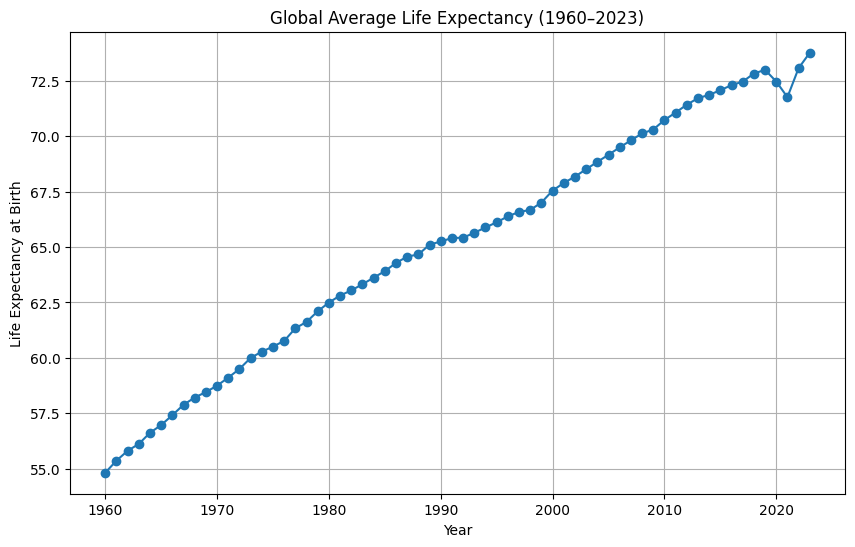

In [110]:
# Plotting the global average life expectancy across the years
plt.figure(figsize=(10,6))
plt.plot(global_avg["Year"], global_avg["Global_Avg_LifeExpectancy"], marker="o")
plt.title("Global Average Life Expectancy (1960–2023)")
plt.xlabel("Year")
plt.ylabel("Life Expectancy at Birth")
plt.grid(True)
plt.show()


**summary on average global life expectancy**

Key Observations

Steady Growth:
Life expectancy rose steadily from ~54 years in 1960 to about 73–74 years in 2023.

Acceleration in 2000s:
From around 2000 onward, the growth trend appears stronger, showing consistent improvements.

Plateau & Fluctuations (2015–2023):
Around 2015–2020, the global average started to flatten slightly, followed by a dip around 2020–2021 (likely due to the COVID-19 pandemic).

Recovery in Recent Years:
After the dip, life expectancy rebounds again in 2022–2023, reaching its highest recorded point.

###**comparison of life expectancy across the continents**

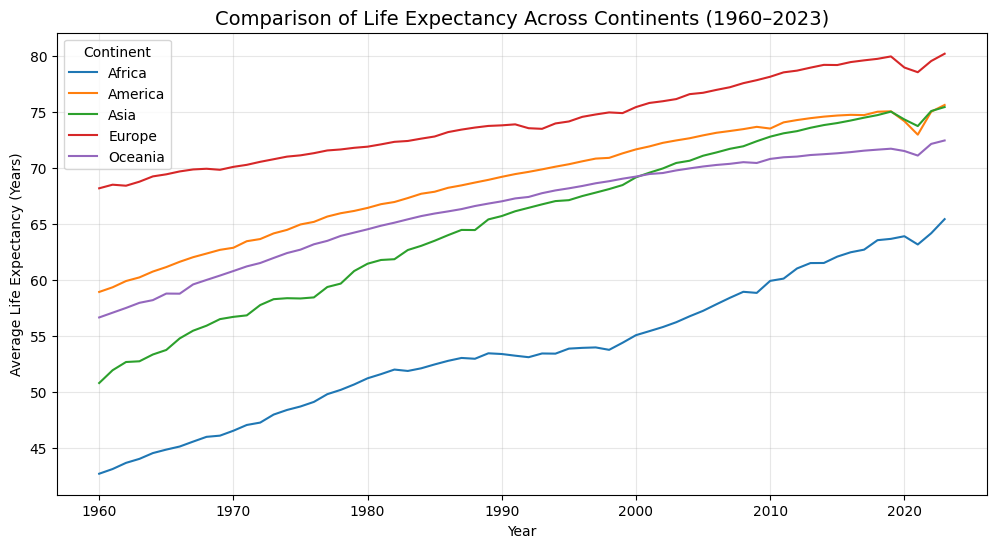

In [112]:
plt.figure(figsize=(12,6))
for continent in regional_trends["Continent"].unique():
    subset = regional_trends[regional_trends["Continent"] == continent]
    plt.plot(subset["Year"], subset["Life Expectancy"], label=continent)

plt.title("Comparison of Life Expectancy Across Continents (1960–2023)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Average Life Expectancy (Years)")
plt.legend(title="Continent")
plt.grid(True, alpha=0.3)
plt.show()

**Summary of compared life expectancy across the continents (1960-2023)**

1.  Europe leads consistently

Life expectancy in Europe starts around 68 years in 1960 and climbs steadily to over 80 years by 2023.

It has the highest life expectancy throughout the entire period.

2.  Africa lags behind but improves steadily

Africa starts at the lowest point (~43 years in 1960).

Growth is visible, reaching about 65 years by 2023.

Still remains the lowest compared to other continents, but the gap has narrowed slightly.

3.  Asia shows strong progress

Starts below 50 years in 1960.

Sharp increase especially after 1970s, almost catching up with the Americas.

By 2023, Asia is around 75–76 years.

4.  Americas maintain strong growth

Started higher than Asia (~59 years in 1960).

Growth continues but at a steadier pace, reaching ~75 years in 2023.

Asia nearly closes the gap with the Americas.

5.  Oceania is steady but slower in improvement

Starts around 57 years in 1960.

Gradual rise, ending near 72–73 years in 2023.

Growth is noticeable but less steep compared to Asia.

Equality Ratio of Life expectancy across the different continents

/tmp/ipython-input-450953049.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




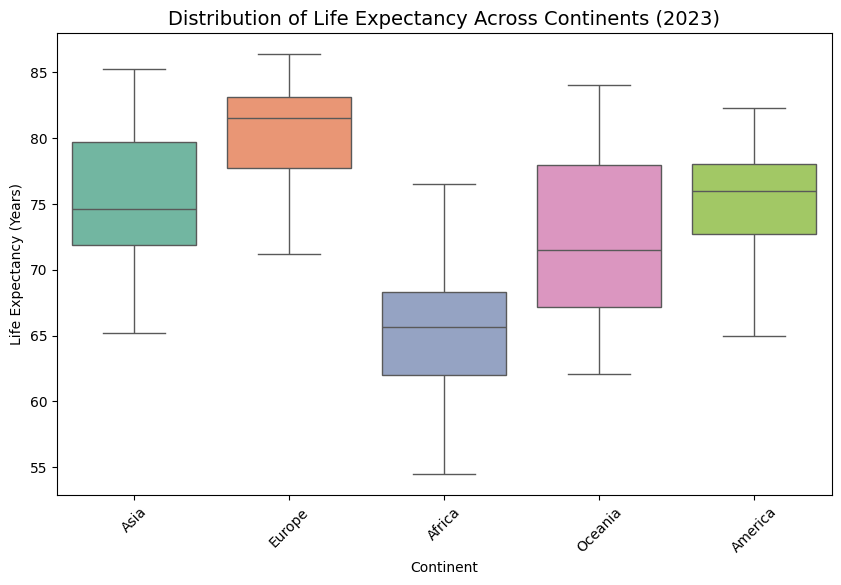

In [114]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_long[df_long["Year"] == 2023],
            x="Continent", y="Life Expectancy", palette="Set2")
plt.title("Distribution of Life Expectancy Across Continents (2023)", fontsize=14)
plt.xticks(rotation=45)
plt.ylabel("Life Expectancy (Years)")
plt.show()


###**Summary of Life expectancy Distribution among the continents**

1.  Europe leads globally

Europe has the highest median life expectancy (~82 years).

The distribution is relatively tight, showing most countries in Europe cluster at the high end (80–85 years).

2.  Africa lags behind significantly

Africa has the lowest median (~65 years).

The spread is wide, with some countries as low as ~55 years and a few reaching into the 70s.

This highlights regional inequality.

3.  Asia is diverse

Median is ~75 years.

Wide spread: some countries in the mid-60s, while others approach 85 years.

Reflects large differences between high-income and lower-income nations.

4.  Oceania shows high variability

Median is ~71–72 years.

Very wide range: from low 60s up to the mid-80s.

Suggests big disparities between countries in the region (e.g., Australia vs Pacific Island nations).

5.  Americas are in the middle

Median around ~76 years.

Spread ranges from mid-60s to ~82 years.



###**Regional trend Analysis**

splitting the dataframe into continents

**AFRICAN TREND ANALYSIS**

In [115]:
# Merging the 'Continent' column from df into df_long (df_long introduces the year column)
# The 'Continent' column is already in df_long, so no merge is needed.
africa_df = df_long[df_long["Continent"] == "Africa"].copy()

# Displaying the head of the filtered DataFrame
print(africa_df.head())

    Country Name Continent  Year  Life Expectancy
2        Algeria    Africa  1960           40.839
5         Angola    Africa  1960           37.933
20         Benin    Africa  1960           38.775
25      Botswana    Africa  1960           51.220
30  Burkina Faso    Africa  1960           36.074


In [116]:
#africa average
africa_trend = (africa_df.groupby("Year")["Life Expectancy"]
                          .mean()
                          .reset_index())

africa_trend.rename(columns={"Life Expectancy": "Africa_Avg_LifeExpectancy"}, inplace=True)

print(africa_trend.head())

   Year  Africa_Avg_LifeExpectancy
0  1960                  42.658960
1  1961                  43.078978
2  1962                  43.629957
3  1963                  43.988394
4  1964                  44.504879


In [117]:
# Calculate average life expectancy trend across Africa
africa_trend = (africa_df.groupby("Year")["Life Expectancy"]
                          .mean()
                          .reset_index())

africa_trend.rename(columns={"Life Expectancy": "Africa_Avg_LifeExpectancy"}, inplace=True)

print("Created africa_trend DataFrame:")
print(africa_trend.head())

Created africa_trend DataFrame:
   Year  Africa_Avg_LifeExpectancy
0  1960                  42.658960
1  1961                  43.078978
2  1962                  43.629957
3  1963                  43.988394
4  1964                  44.504879


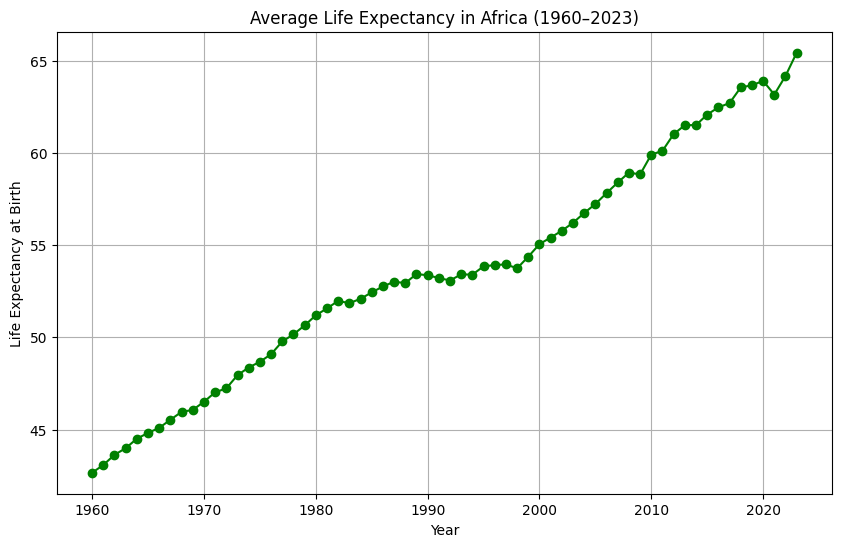

In [118]:
#plotting average life expectancy trend across africa
plt.figure(figsize=(10,6))
plt.plot(africa_trend["Year"], africa_trend["Africa_Avg_LifeExpectancy"], marker="o", color="green")
plt.title("Average Life Expectancy in Africa (1960–2023)")
plt.xlabel("Year")
plt.ylabel("Life Expectancy at Birth")
plt.grid(True)
plt.show()


**summary of Average life expectancy in Africa 1960-2023**

Steady Growth Overall:
Life expectancy in Africa rose from ~43 years in 1961 to about 65 years in 2023.

Slower Growth in the 1980s–1990s:
The curve flattens between late 1980s and 1990s, reflecting challenges such as the HIV/AIDS epidemic, political instability, and limited healthcare infrastructure in many African nations.

Strong Recovery After 2000:
From the early 2000s onwards, life expectancy rises more sharply, reaching its highest level in 2023. This improvement aligns with better access to healthcare, vaccination programs, and disease control.

Recent Fluctuations (2018–2021):
Small dips around 2020–2021 suggest the impact of the COVID-19 pandemic, followed by a recovery in 2022–2023.

**Highest and Least Life expectancy countries in Africa**

In [119]:
# Computing the mean life expectancy per country (across all years)
avg_life = (africa_df.groupby("Country Name")["Life Expectancy"]
                       .mean()
                       .reset_index()
                       .sort_values(by="Life Expectancy", ascending=False))

# Selecting top 10 countries
top10_countries_africa = avg_life.head(10)["Country Name"].tolist()
print(top10_countries_africa)

['Seychelles', 'Mauritius', 'Tunisia', 'Libya', 'Cabo Verde', 'Algeria', 'Morocco', 'Egypt, Arab Rep.', 'Sao Tome and Principe', 'Gabon']


In [120]:
# Computeing the mean life expectancy per country across all years
avg_life = (africa_df.groupby("Country Name")["Life Expectancy"]
                       .mean()
                       .reset_index()
                       .sort_values(by="Life Expectancy", ascending=False))

# Picking top 10 countries with highest average life expectancy
top10_avg = avg_life.head(10)
print(top10_avg)

             Country Name  Life Expectancy
42             Seychelles        69.411856
33              Mauritius        68.813267
50                Tunisia        65.953469
28                  Libya        65.387734
6              Cabo Verde        64.510328
0                 Algeria        62.099328
34                Morocco        61.076703
15       Egypt, Arab Rep.        60.760344
40  Sao Tome and Principe        60.064375
20                  Gabon        59.554469


/tmp/ipython-input-1965032424.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




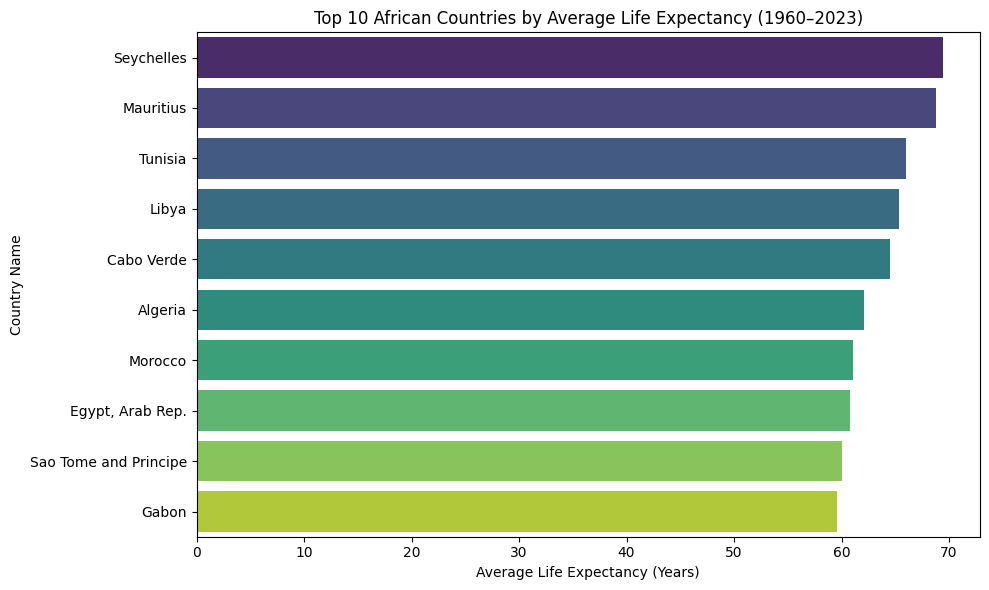

In [58]:
plt.figure(figsize=(10, 6)) # Adjust figure size as needed
sns.barplot(
    data=top10_avg,
    x="Life Expectancy",
    y="Country Name",
    palette="viridis" # Choose a color palette
)

plt.title("Top 10 African Countries by Average Life Expectancy (1960–2023)")
plt.xlabel("Average Life Expectancy (Years)")
plt.ylabel("Country Name")
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

In [60]:
avg_life = (africa_df.groupby("Country Name")["Life Expectancy"]
                       .mean()
                       .reset_index()
                       .sort_values(by="Life Expectancy", ascending=False))

# Selecting least 10 countries with average life expectancy
least_10_countries_africa = avg_life.tail(10)["Country Name"].tolist()
print(least_10_countries_africa)

['Somalia', 'Malawi', 'Angola', 'Central African Republic', 'Chad', 'Nigeria', 'Mali', 'Niger', 'Sierra Leone', 'South Sudan']


In [122]:
# Computing the mean life expectancy per country across all years
avg_life = (africa_df.groupby("Country Name")["Life Expectancy"]
                       .mean()
                       .reset_index()
                       .sort_values(by="Life Expectancy", ascending=False))

# Picking least 10 countries with average life expectancy
least_10_avg = avg_life.tail(10)
print(least_10_avg)

                Country Name  Life Expectancy
44                   Somalia        48.127453
30                    Malawi        47.427344
1                     Angola        47.304828
8   Central African Republic        46.308422
9                       Chad        46.244984
38                   Nigeria        46.197484
31                      Mali        45.976312
37                     Niger        45.929984
43              Sierra Leone        45.428203
46               South Sudan        38.991047


/tmp/ipython-input-43806280.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




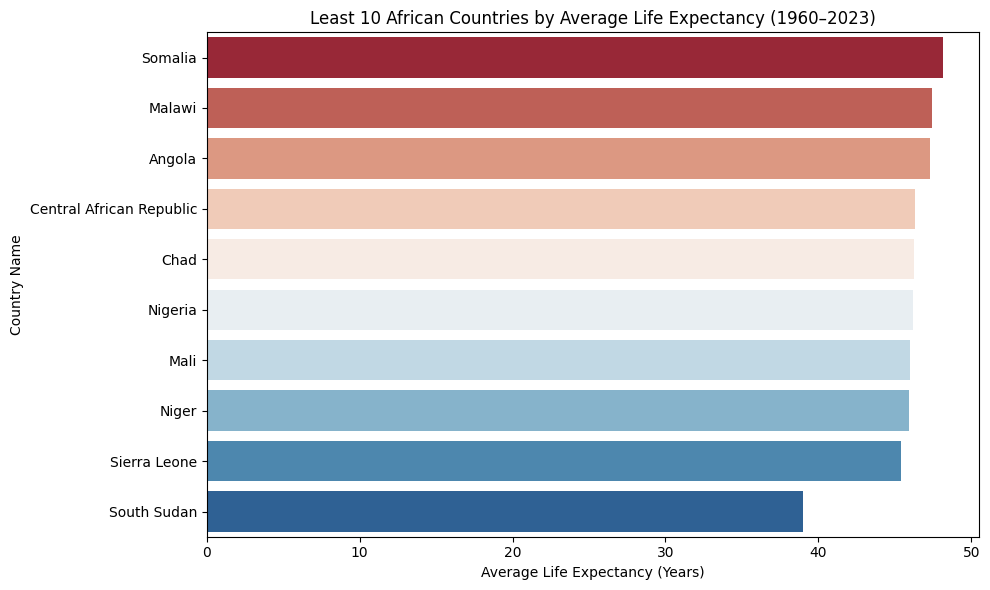

In [168]:
plt.figure(figsize=(10, 6)) # Adjust figure size as needed
sns.barplot(
    data=least_10_avg,
    x="Life Expectancy",
    y="Country Name",
    palette="RdBu" # Choose a color palette
)

plt.title("Least 10 African Countries by Average Life Expectancy (1960–2023)")
plt.xlabel("Average Life Expectancy (Years)")
plt.ylabel("Country Name")
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

Life expectancy Heat Map on African Countries 1960-2023

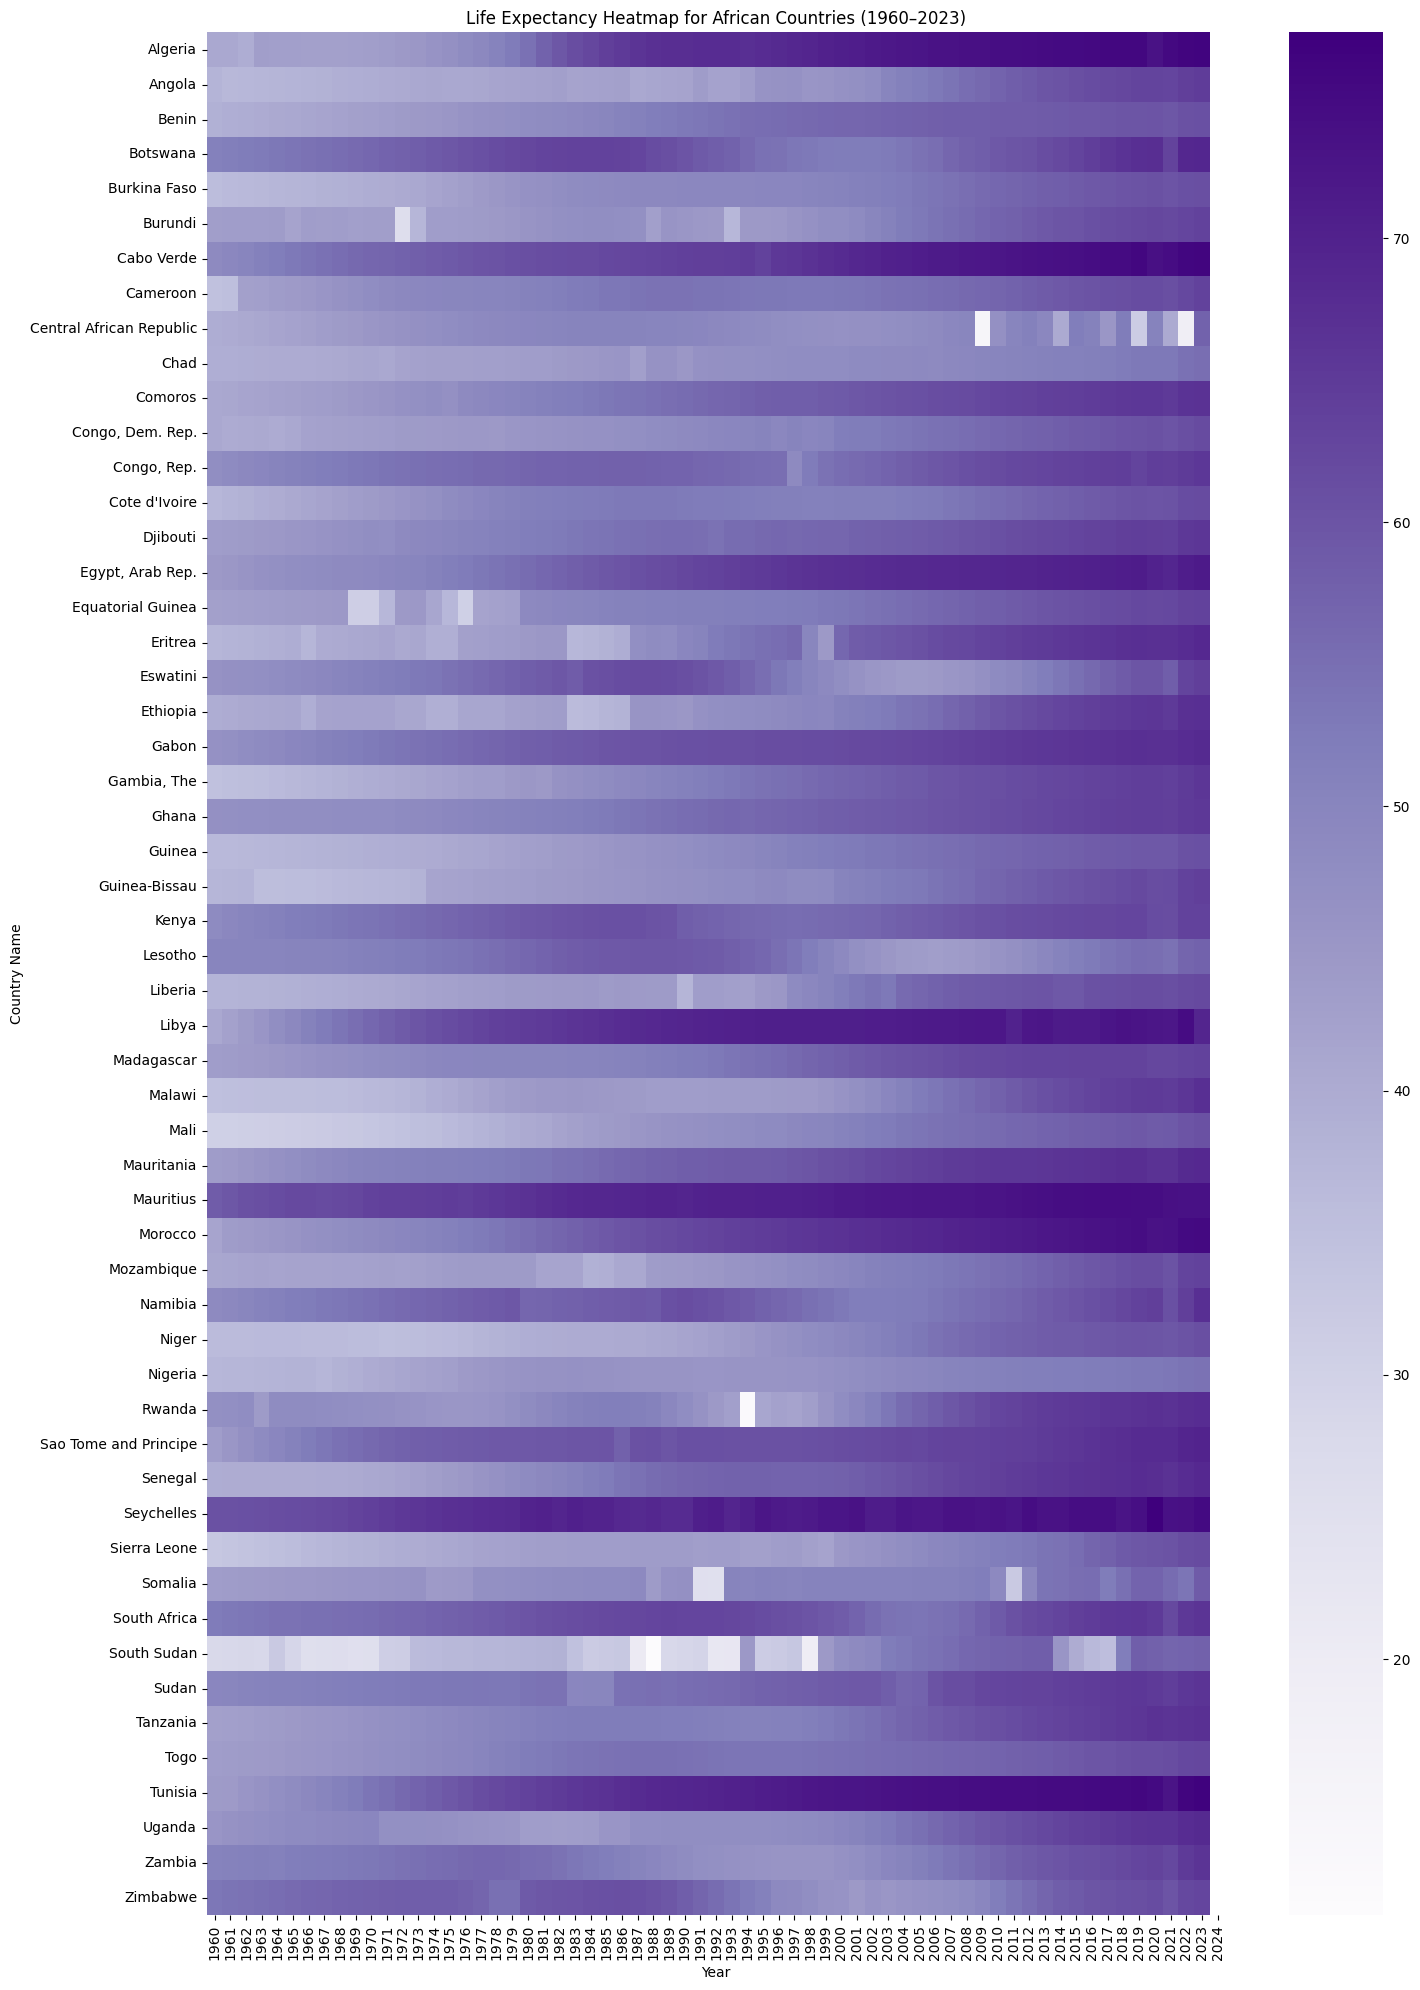

In [163]:
africa_pivot = africa_df.pivot(index="Country Name", columns="Year", values="Life Expectancy")

plt.figure(figsize=(15, 20)) # Adjust figure size as needed
sns.heatmap(africa_pivot, cmap="Purples", annot=False, fmt=".1f") # annot=False to avoid clutter
plt.title("Life Expectancy Heatmap for African Countries (1960–2023)")
plt.xlabel("Year")
plt.ylabel("Country Name")
plt.tight_layout()
plt.show()

###**prediction on Average life expectancy Africa 2024-2049**

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpayg8w6cx/4mm8bc9t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpayg8w6cx/1gm98i6v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11060', 'data', 'file=/tmp/tmpayg8w6cx/4mm8bc9t.json', 'init=/tmp/tmpayg8w6cx/1gm98i6v.json', 'output', 'file=/tmp/tmpayg8w6cx/prophet_modelmp7pezn_/prophet_model-20250909164250.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
16:42:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:42:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages

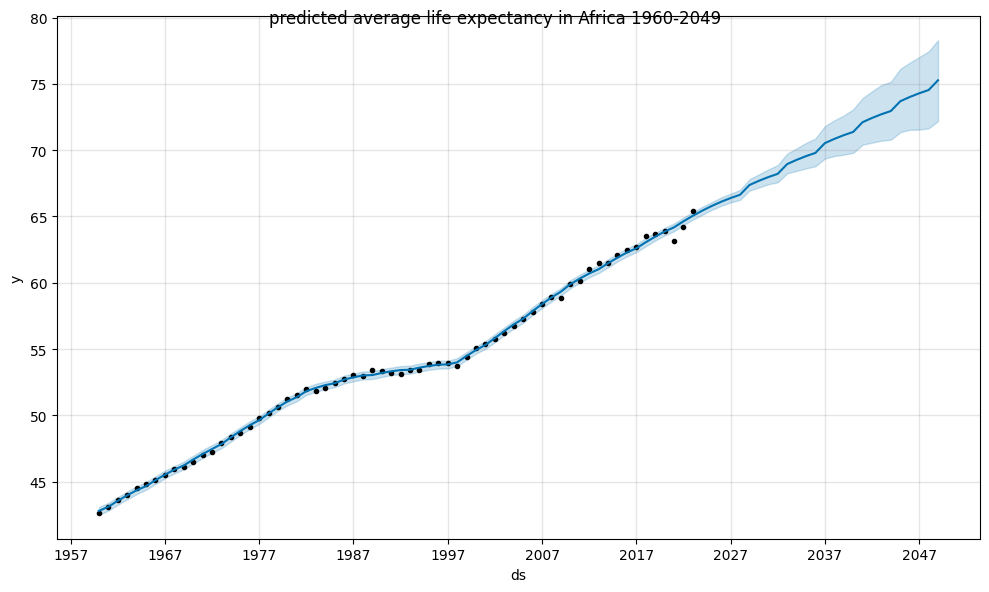

In [123]:
df_prophet_africa = africa_trend.rename(columns={"Year":"ds", "Africa_Avg_LifeExpectancy":"y"})

df_prophet_africa["ds"] = pd.to_datetime(df_prophet_africa["ds"], format="%Y") #converting the years to datetime (ds)

# Building and fitting the model
model = Prophet()
model.fit(df_prophet_africa)

# Future years
future = model.make_future_dataframe(periods=25, freq="Y")  # predict 25 years ahead
forecast = model.predict(future)

# Plot forecasting
fig = model.plot(forecast)
fig.suptitle ('predicted average life expectancy in Africa 1960-2049')
fig.show()

**Predicted average life expectancy in Africa 1960-2049**

Historical Growth (1960–2023):

Life expectancy increased steadily from ~43 years in 1960 to about 65 years by 2023.

The model captures past fluctuations, such as slower growth in the 1980s–1990s.

Future Predictions (2024–2049):

Life expectancy is forecasted to rise from ~65 years in 2023 to around 75 years by 2049.

The upward trend suggests continued improvements in healthcare, nutrition, and living standards.

Uncertainty Band:

The shaded region widens after ~2035, showing greater uncertainty in long-term forecasts.

Lower bound ~72 years, upper bound ~78 years by 2049.

**EAST AFRICAN TREND ANALYSIS**

In [76]:
#Splitting the df into east african countries
east_african_countries = [
    "Kenya", "Uganda", "Tanzania", "Rwanda", "Burundi",
    "South Sudan", "Ethiopia", "Eritrea", "Somalia",
    "Djibouti"
]


east_africa = df[df["Country Name"].isin(east_african_countries)]

print(east_africa.head())


    Country Name    1960    1961    1962    1963    1964    1965    1966  \
31       Burundi  43.262  43.364  43.492  43.559  43.601  41.844  43.529   
53      Djibouti  43.421  43.781  44.092  44.442  44.812  45.234  45.620   
60       Eritrea  37.443  37.912  38.346  38.833  39.184  39.576  37.634   
63      Ethiopia  39.615  40.198  40.531  40.967  41.261  41.413  39.343   
100        Kenya  48.477  49.330  50.104  50.758  51.323  51.886  52.383   

       1967    1968  ...    2015    2016    2017    2018    2019    2020  \
31   43.332  43.405  ...  60.107  60.789  61.345  61.806  62.180  62.569   
53   46.103  46.552  ...  62.833  63.335  63.710  64.105  64.381  64.200   
60   40.151  40.483  ...  65.909  66.242  66.612  66.979  67.306  66.980   
63   41.941  42.092  ...  63.592  64.162  64.766  65.257  65.741  65.969   
100  52.796  53.302  ...  62.279  62.526  62.725  62.825  62.939  61.596   

       2021    2022    2023  Continent  
31   62.101  62.882  63.651     Africa  
53  

In [77]:
# Filtering df_long for only East African countries
east_africa_df = df_long[df_long["Country Name"].isin(east_african_countries)].copy()

east_africa_trend = (east_africa_df.groupby("Year")["Life Expectancy"]
                                  .mean()
                                  .reset_index())

print(east_africa_trend.head())

   Year  Life Expectancy
0  1960          41.9066
1  1961          42.3100
2  1962          42.6881
3  1963          42.5994
4  1964          43.7084


In [78]:
#east africa average
east_africa_trend = (east_africa_df.groupby("Year")["Life Expectancy"]
                          .mean()
                          .reset_index())

east_africa_trend.rename(columns={"Life Expectancy": "East Africa_Avg_LifeExpectancy"}, inplace=True)

print(east_africa_trend.head())

   Year  East Africa_Avg_LifeExpectancy
0  1960                         41.9066
1  1961                         42.3100
2  1962                         42.6881
3  1963                         42.5994
4  1964                         43.7084


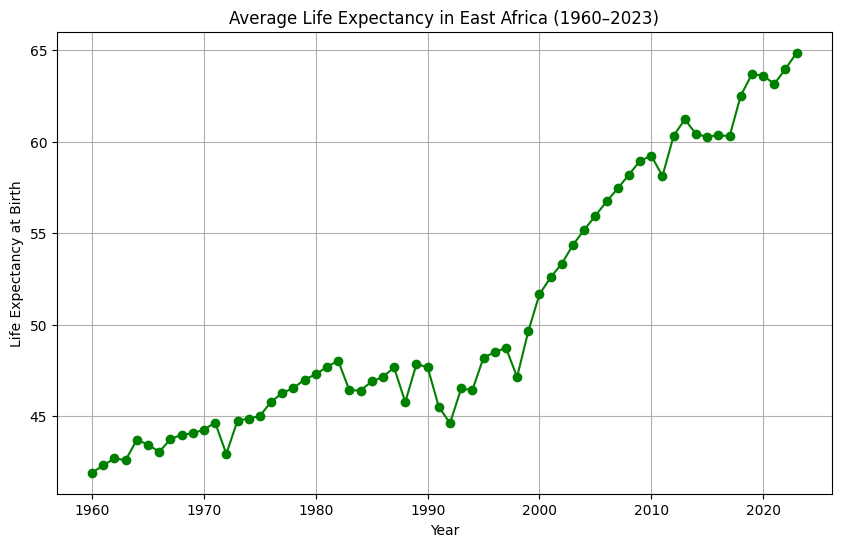

In [79]:
plt.figure(figsize=(10,6))
plt.plot(east_africa_trend["Year"], east_africa_trend["East Africa_Avg_LifeExpectancy"], marker="o", color="green")
plt.title("Average Life Expectancy in East Africa (1960–2023)")
plt.xlabel("Year")
plt.ylabel("Life Expectancy at Birth")
plt.grid(True)
plt.show()

**Summary of Average Life Expectancy in East Africa (1960–2023)**

In 1960, the average life expectancy was just over 42 years.

The life expectancy has shown a consistent upward trend over the entire period, with a few plateaus and slight dips. For instance, there's a noticeable period of slower growth in the early to mid-1990s.

By 2023, the average life expectancy had risen to just over 65 years.

The most significant period of growth appears to be from the late 1990s to the present, with a particularly steep rise around the year 2000.

Life expectancy Heat Map EAST AFRICA 1960-2023

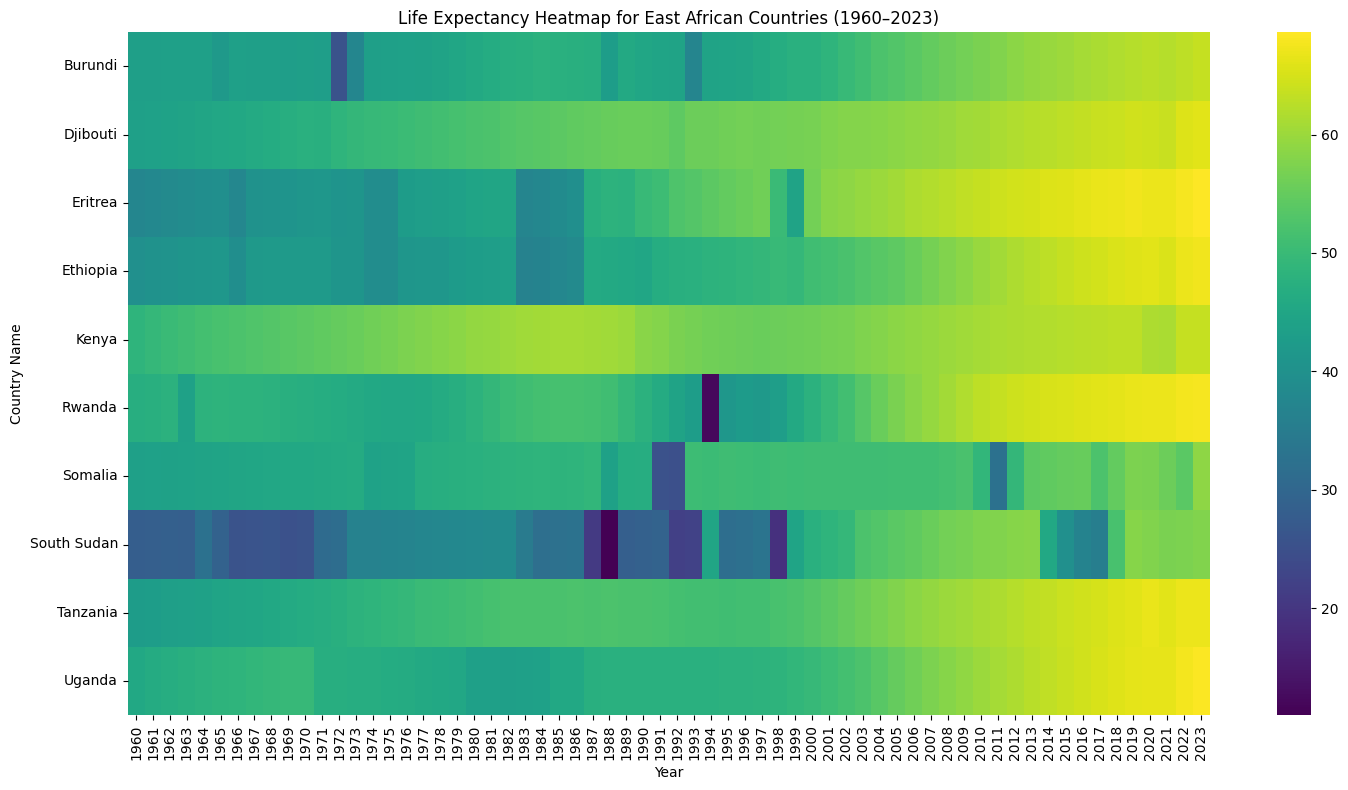

In [124]:
# Pivoting the data to get years as columns and countries as rows
east_africa_pivot = east_africa_df.pivot(index="Country Name", columns="Year", values="Life Expectancy")

plt.figure(figsize=(15, 8)) # Adjust figure size as needed
sns.heatmap(east_africa_pivot, cmap="viridis", annot=False, fmt=".1f") # annot=False to avoid clutter
plt.title("Life Expectancy Heatmap for East African Countries (1960–2023)")
plt.xlabel("Year")
plt.ylabel("Country Name")
plt.tight_layout()
plt.show()

In [83]:
avg_east_africa = (east_africa_df.groupby("Country Name")["Life Expectancy"]
                       .mean()
                       .reset_index()
                       .sort_values(by="Life Expectancy", ascending=False))

# Selecting top 10 countries
top_east_africa = avg_east_africa["Country Name"].tolist()
print(top_east_africa)

#MEAN LIFE EXPECTANCY IN EAST AFRICA

avg_east_africa = (east_africa_df.groupby("Country Name")["Life Expectancy"]
                       .mean()
                       .reset_index()
                       .sort_values(by="Life Expectancy", ascending=False))

# top 10 east african countries
East_Africa_top_avg = avg_east_africa
print(East_Africa_top_avg)

['Kenya', 'Djibouti', 'Tanzania', 'Rwanda', 'Uganda', 'Eritrea', 'Ethiopia', 'Burundi', 'Somalia', 'South Sudan']
  Country Name  Life Expectancy
4        Kenya        57.769016
1     Djibouti        54.918125
8     Tanzania        53.724406
5       Rwanda        51.923266
9       Uganda        51.893453
2      Eritrea        51.352719
3     Ethiopia        49.311672
0      Burundi        48.894469
6      Somalia        48.127453
7  South Sudan        38.991047


/tmp/ipython-input-3567245066.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




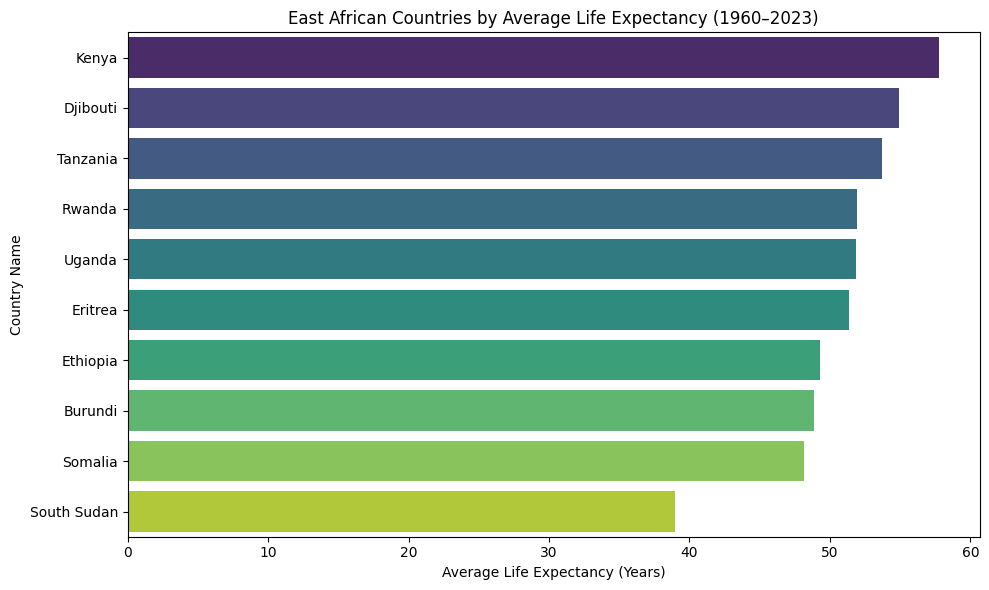

In [85]:
plt.figure(figsize=(10, 6)) # Adjust figure size as needed
sns.barplot(
    data=East_Africa_top_avg,
    x="Life Expectancy",
    y="Country Name",
    palette="viridis" # Choose a color palette
)

plt.title("East African Countries by Average Life Expectancy (1960–2023)")
plt.xlabel("Average Life Expectancy (Years)")
plt.ylabel("Country Name")
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

**Future prediction East Africa**

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpayg8w6cx/zc9wyav_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpayg8w6cx/t3pt87rh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47174', 'data', 'file=/tmp/tmpayg8w6cx/zc9wyav_.json', 'init=/tmp/tmpayg8w6cx/t3pt87rh.json', 'output', 'file=/tmp/tmpayg8w6cx/prophet_modelocho2xnq/prophet_model-20250909171755.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
17:17:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:17:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages

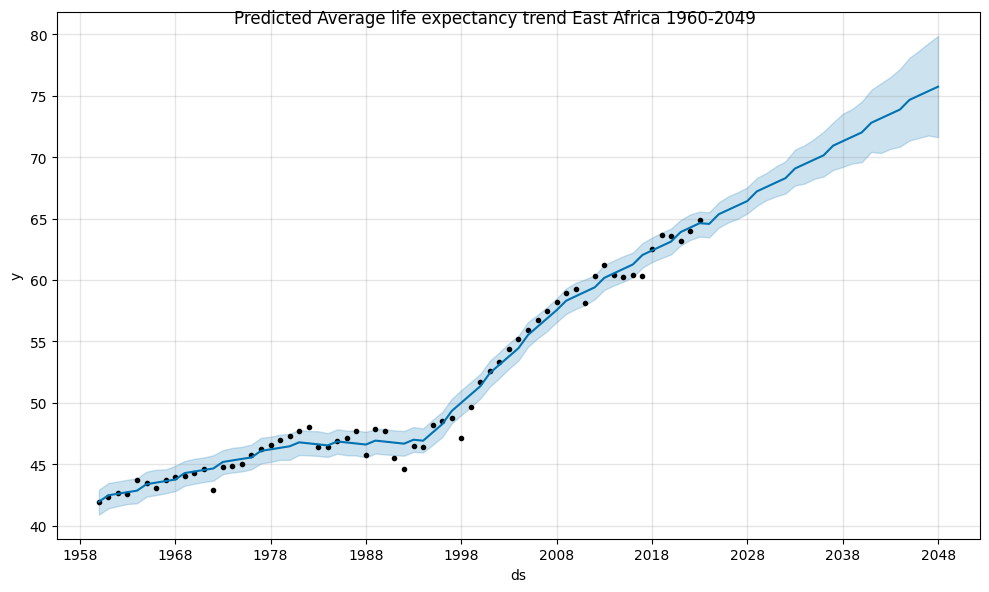

In [170]:
# Preparing data for Prophet
df_prophet = east_africa_trend.rename(columns={"Year":"ds", "East Africa_Avg_LifeExpectancy":"y"})

# coverting (years) ds as datetime
df_prophet["ds"] = pd.to_datetime(df_prophet["ds"], format="%Y")

# Building and fitting model
model = Prophet()
model.fit(df_prophet)

# Future years
future = model.make_future_dataframe(periods=25, freq="Y")  # predict 25 years ahead
forecast = model.predict(future)

# Plot forecast
fig = model.plot(forecast)
fig.suptitle("Predicted Average life expectancy trend East Africa 1960-2049") # Add title using suptitle
fig.show()

**Summary of Predicted Average life expectancy trend East Africa 1960-2049.**

Historical Trend (1960 - 2023): The average life expectancy has risen significantly. It started at just over 42 years in 1960 and reached slightly more than 65 years by 2023. The graph shows a consistent, though not always smooth, upward trajectory.

Projected Trend (2024 - 2049): The graph projects that the life expectancy will continue to increase. The line climbs from 65 years in 2024 and is predicted to reach approximately 75 years by the year 2049.

###**Kenya Trend Analysis**

In [87]:
kenya = df[df['Country Name'] == 'Kenya'] # singling out kenya row from the data set
print(kenya)



    Country Name    1960   1961    1962    1963    1964    1965    1966  \
100        Kenya  48.477  49.33  50.104  50.758  51.323  51.886  52.383   

       1967    1968  ...    2015    2016    2017    2018    2019    2020  \
100  52.796  53.302  ...  62.279  62.526  62.725  62.825  62.939  61.596   

       2021    2022    2023  Continent  
100  61.225  63.549  63.646     Africa  

[1 rows x 66 columns]


In [88]:
kenya_df = df_long[df_long["Country Name"] == 'Kenya'].copy() # adding the year column to match with the different year trend
print(kenya_df)

      Country Name Continent  Year  Life Expectancy
100          Kenya    Africa  1960           48.477
316          Kenya    Africa  1961           49.330
532          Kenya    Africa  1962           50.104
748          Kenya    Africa  1963           50.758
964          Kenya    Africa  1964           51.323
...            ...       ...   ...              ...
12844        Kenya    Africa  2019           62.939
13060        Kenya    Africa  2020           61.596
13276        Kenya    Africa  2021           61.225
13492        Kenya    Africa  2022           63.549
13708        Kenya    Africa  2023           63.646

[64 rows x 4 columns]


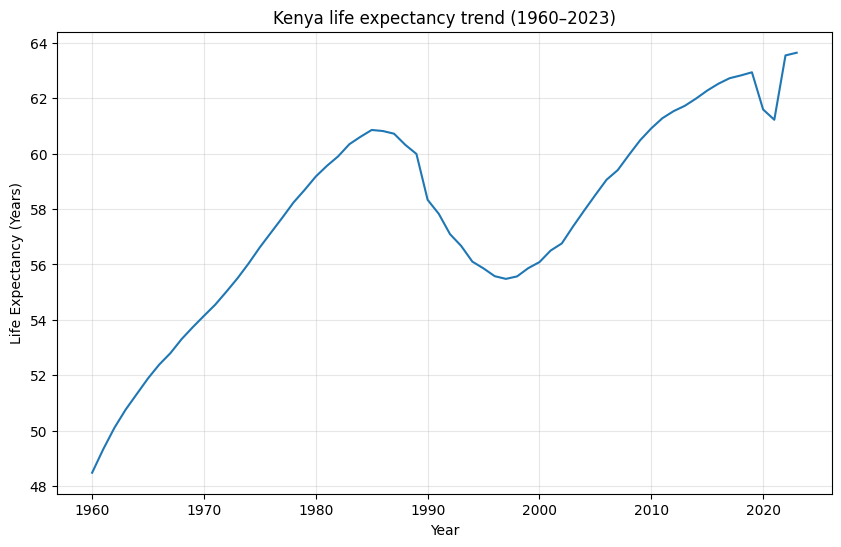

In [169]:
plt.figure(figsize=(10, 6)) # Adjust figure size as needed
sns.lineplot(
    data=kenya_df,
    x="Year",
    y="Life Expectancy",
)

plt.title("Kenya life expectancy trend (1960–2023)")
plt.xlabel("Year")
plt.ylabel("Life Expectancy (Years)")
plt.grid(True, alpha=0.3)
plt.show()

####**Prediction on Life expectancy in Kenya 1960-2049**





**Summary of Kenya life expectancy trend (1960–2023)**

From 1960 to 1985, life expectancy in Kenya increased significantly, from about 48 years to over 60 years.

However, between 1985 and 2000, there was a sharp decline, with life expectancy falling to below 56 years. This dip is likely related to the impact of the HIV/AIDS epidemic in the region during that period.

Following the year 2000, life expectancy in Kenya began to recover and rise sharply, reaching its peak of almost 64 years by 2023.

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpayg8w6cx/uv45olxi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpayg8w6cx/gejuz5be.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89773', 'data', 'file=/tmp/tmpayg8w6cx/uv45olxi.json', 'init=/tmp/tmpayg8w6cx/gejuz5be.json', 'output', 'file=/tmp/tmpayg8w6cx/prophet_modeleb9cxozh/prophet_model-20250909163335.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
16:33:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:33:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages

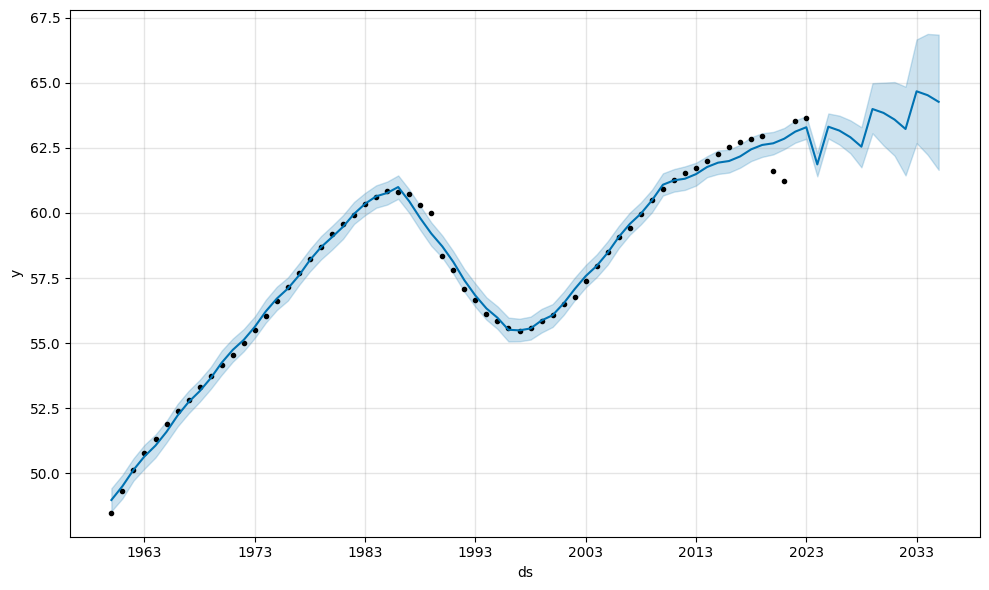

In [91]:
df_prophet_kenya = kenya_df.rename(columns={"Year":"ds", "Life Expectancy":"y"})

df_prophet_kenya["ds"] = pd.to_datetime(df_prophet_kenya["ds"], format="%Y") #Converting years to date_time (ds)

# Build and fit model
model = Prophet()
model.fit(df_prophet_kenya)

# Future years
future = model.make_future_dataframe(periods=12, freq="Y")  # predict 12 years ahead
forecast = model.predict(future)

# Plot forecasting
fig = model.plot(forecast)
fig.show()

**summary of predicted average life expectancy trend in kenya 1960-2049**

Continued Growth: The central, bold line indicates a strong upward trend in life expectancy, predicting a steady increase from the current levels.

Projected Values: The average life expectancy is predicted to rise from the low 60s in the early 2020s to well over 65 years by the late 2030s and potentially approaching 70 years by 2049.